In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [95]:
x=pd.read_csv("/content/Housing.csv")
x.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [96]:
x.shape

(545, 13)

In [97]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [98]:
z=x.select_dtypes(include=['object'])
y=x.select_dtypes(include=['int64'])
for i in z.columns:
  print(i)
  print(z[i].unique())
  print("\n")

mainroad
['yes' 'no']


guestroom
['no' 'yes']


basement
['no' 'yes']


hotwaterheating
['no' 'yes']


airconditioning
['yes' 'no']


prefarea
['yes' 'no']


furnishingstatus
['furnished' 'semi-furnished' 'unfurnished']




In [99]:
z.columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

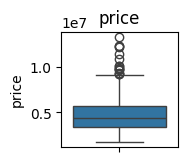

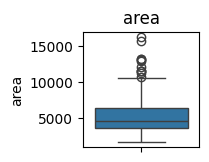

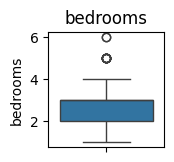

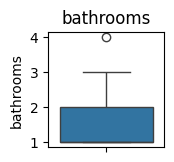

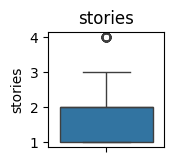

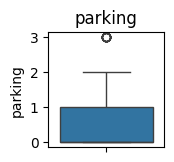

In [100]:
for j in y.columns:
  plt.figure(figsize=(1.5,1.5))
  sns.boxplot(y[j])
  plt.title(j)
  plt.show()

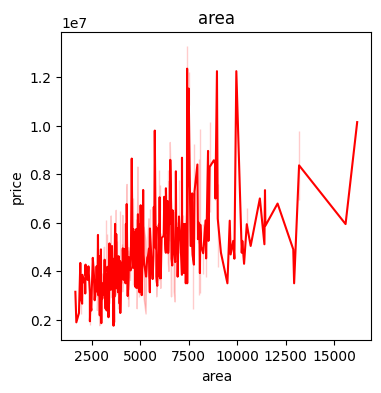

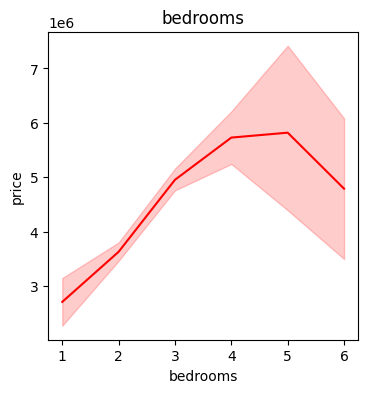

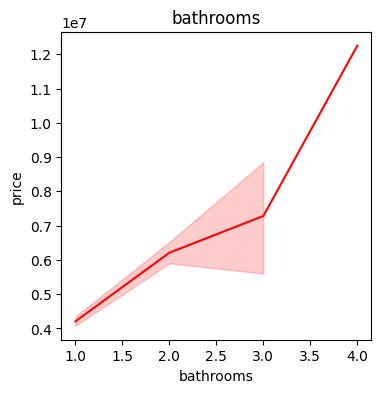

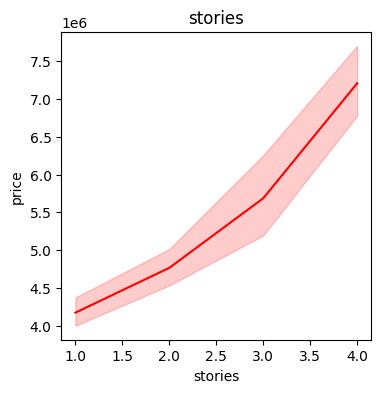

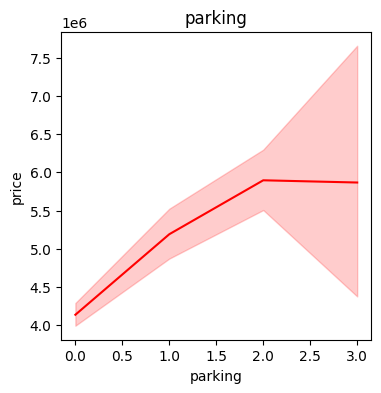

In [101]:
for j in y.columns:
  if j!='price':
    plt.figure(figsize=(4,4))
    sns.lineplot(data=y,y="price",x=y[j],color='red')
    plt.xlabel(j)
    plt.ylabel("price")
    plt.title(j)
    plt.show()

In [102]:
fea=x.drop('price',axis=1)
tar=x['price']

In [103]:
tar

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [104]:
xtr,xte,ytr,yte=train_test_split(fea,tar,test_size=0.2,random_state=42)


In [105]:
ne=LabelEncoder()
yesno=['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea']
for i in yesno:
  xtr[i]=ne.fit_transform(xtr[i])
  xte[i]=ne.transform(xte[i])

In [106]:
oe=OrdinalEncoder()
xtr['furnishingstatus']=oe.fit_transform(xtr[['furnishingstatus']])
xte['furnishingstatus']=oe.transform(xte[['furnishingstatus']])

In [107]:
pd.DataFrame(xtr).head(2)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,6000,3,2,4,1,0,0,0,1,1,0,0.0
93,7200,3,2,1,1,0,1,0,1,3,0,1.0


In [108]:
sc=StandardScaler()
for i in y.columns:
  if i!='price':
   xtr[i]=sc.fit_transform(xtr[[i]])
   xte[i]=sc.transform(xte[[i]])

In [109]:
pd.DataFrame(xtr).head(2)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,0.384168,0.055271,1.539173,2.587644,1,0,0,0,1,0.367957,0,0.0
93,0.929181,0.055271,1.539173,-0.912499,1,0,1,0,1,2.709987,0,1.0


In [110]:
rf=RandomForestRegressor()
rf.fit(xtr,ytr)

pred1=rf.predict(xte)
print(r2_score(yte,pred1))

0.6262550251852048


In [111]:
lr=LinearRegression()
pred2=rf.predict(xte)
print(r2_score(yte,pred2))

0.6262550251852048


In [112]:
dt=DecisionTreeRegressor()
pred2=rf.predict(xte)
print(r2_score(yte,pred2))

0.6262550251852048
